In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("../input/socc-ai-assignment-1/train.csv")
test=pd.read_csv("../input/socc-ai-assignment-1/test.csv")

# Pandas Profiling

In [3]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(train)
profile

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# Target variable plot

Text(0.5, 1.0, 'Target Variable "Churn"')

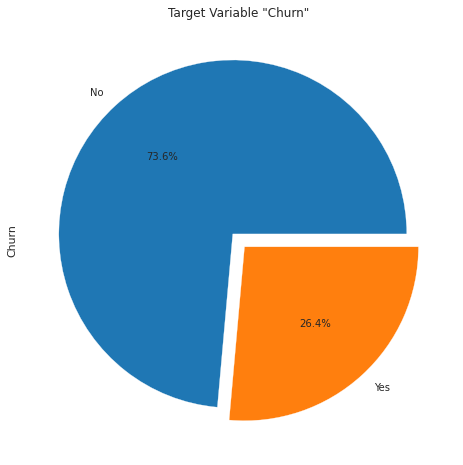

In [4]:
plt.figure(figsize=(8,8))
train.Churn.value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0.05))
plt.title('Target Variable "Churn"')

# Categorical features

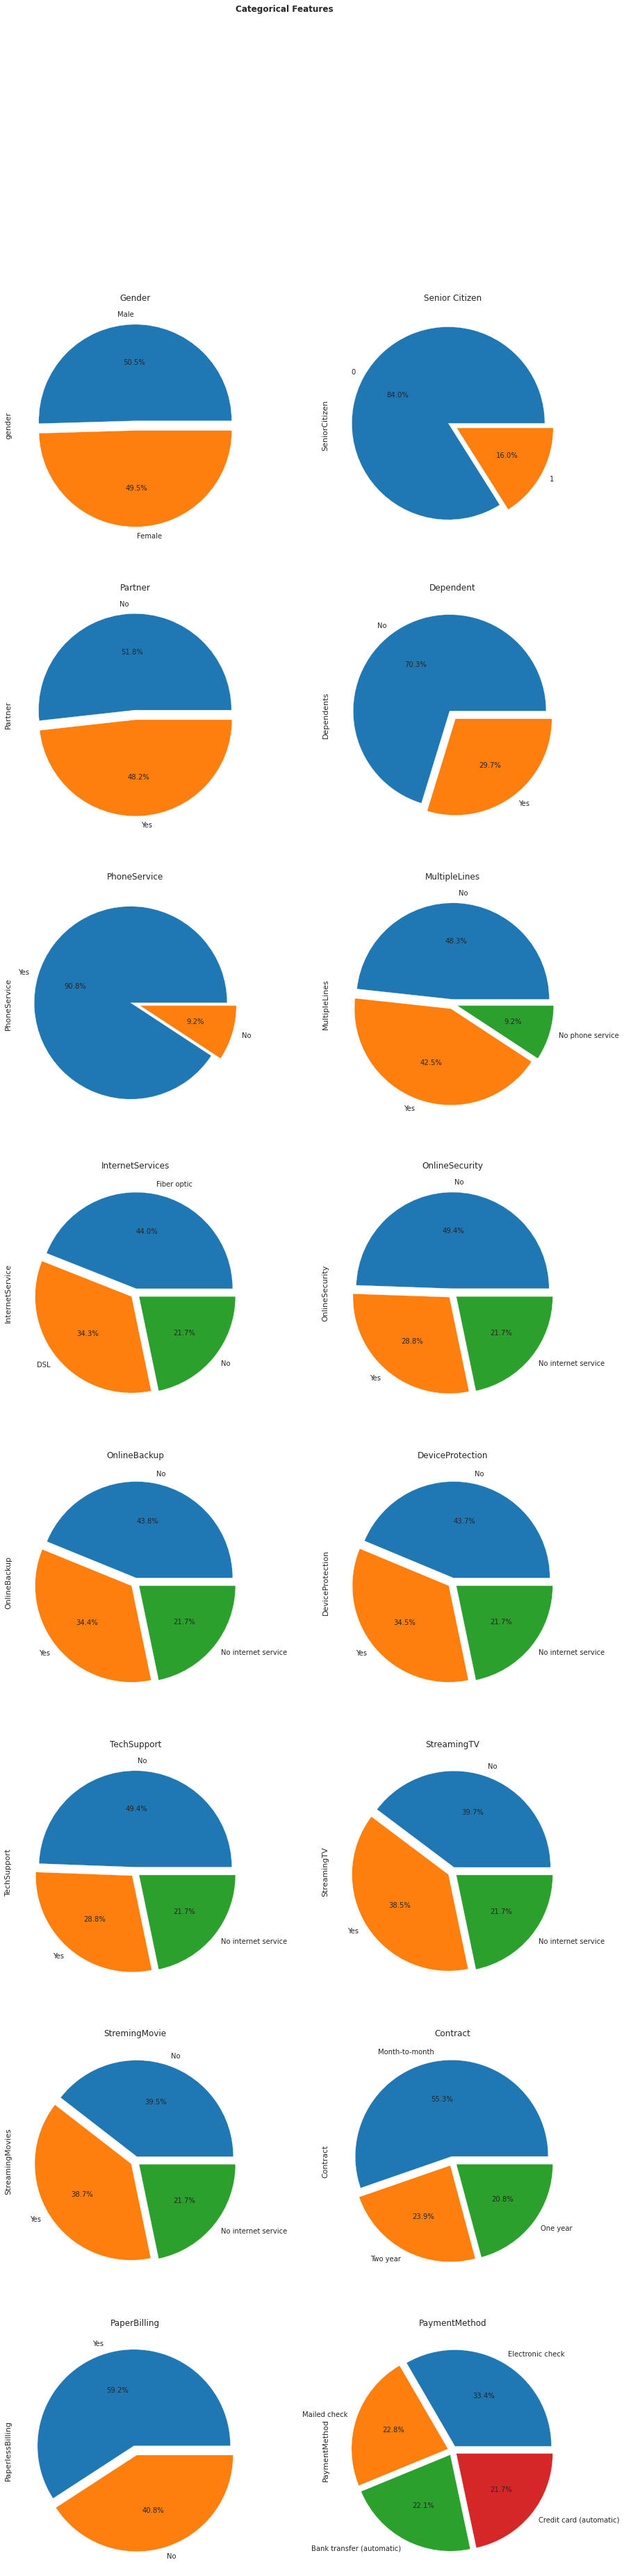

In [5]:
fig, (ax) = plt.subplots(8, 2, figsize=(15,60))

feat = train[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']]

feat['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0.05),ax =ax[0][0])
ax[0][0].set_title('Gender')
feat['SeniorCitizen'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0.05),ax =ax[0][1])
ax[0][1].set_title('Senior Citizen')
feat['Partner'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0.05),ax =ax[1][0])
ax[1][0].set_title('Partner')
feat['Dependents'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0.05),ax =ax[1][1])
ax[1][1].set_title('Dependent')
feat['PhoneService'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0.05),ax =ax[2][0])
ax[2][0].set_title('PhoneService')
feat['MultipleLines'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0.05,0.05),ax =ax[2][1])
ax[2][1].set_title('MultipleLines')
feat['InternetService'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0.05,0.05),ax =ax[3][0])
ax[3][0].set_title('InternetServices')
feat['OnlineSecurity'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0.05,0.05),ax =ax[3][1])
ax[3][1].set_title('OnlineSecurity')
feat['OnlineBackup'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0.05,0.05),ax =ax[4][0])
ax[4][0].set_title('OnlineBackup')
feat['DeviceProtection'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0.05,0.05),ax =ax[4][1])
ax[4][1].set_title('DeviceProtection')
feat['TechSupport'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0.05,0.05),ax =ax[5][0])
ax[5][0].set_title('TechSupport')
feat['StreamingTV'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0.05,0.05),ax =ax[5][1])
ax[5][1].set_title('StreamingTV')
feat['StreamingMovies'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0.05,0.05),ax =ax[6][0])
ax[6][0].set_title('StremingMovie')
feat['Contract'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0.05,0.05),ax =ax[6][1])
ax[6][1].set_title('Contract')
feat['PaperlessBilling'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0.05),ax =ax[7][0])
ax[7][0].set_title('PaperBilling')
feat['PaymentMethod'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=(0.05,0.05,0.05,0.05),ax =ax[7][1])
ax[7][1].set_title('PaymentMethod')

plt.suptitle(
    "Categorical Features", fontweight="bold")
plt.show()

# EDA

In [6]:
# this function creates a barplot given the data and the categorical feature against the Churns
def plot_categorical(data, feature, rotate=0, y_axis="percentage of customers", title=None):
    plt.figure()
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15, rotation=rotate)
    sns.set(rc={'figure.figsize':(10,7)})
    five_thirty_eight = [
                        "#30a2da",
                        "#fc4f30",
                        "#e5ae38",
                        "#6d904f",
                        "#8b8b8b",
                        ]
    sns.set_palette(five_thirty_eight)

    graph_data = data.groupby(feature)["Churn"].value_counts().to_frame()
    graph_data = graph_data.rename({"Churn": y_axis}, axis=1).reset_index()
    graph_data[y_axis] = graph_data[y_axis]/len(data)
    bar = sns.barplot(x=feature, y= y_axis, hue='Churn', data=graph_data)
#     bar.set_xticklabels(['{:,.0%}'.format(x) for x in bar.get_xticks()])
    bar.set_yticklabels(['{:,.0%}'.format(x) for x in bar.get_yticks()])
    
    for p in bar.patches:
             bar.annotate("%.2f" % (p.get_height()*100), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, xytext=(0, 20),
                 textcoords='offset points')
    bar.axes.set_title(title,fontsize=20)
    bar.set_xlabel("")
    bar.set_ylabel(y_axis, fontsize=18)
    bar.plot()
    plt.savefig('bar.pdf')

In [7]:
excluded_features = ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']
cat_features = train.drop(excluded_features, axis=1)

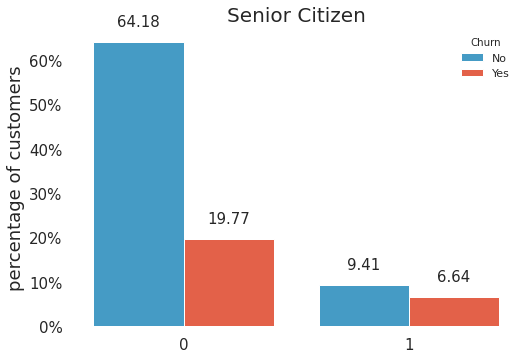

In [8]:
plot_categorical(data=train, feature='SeniorCitizen', title='Senior Citizen')

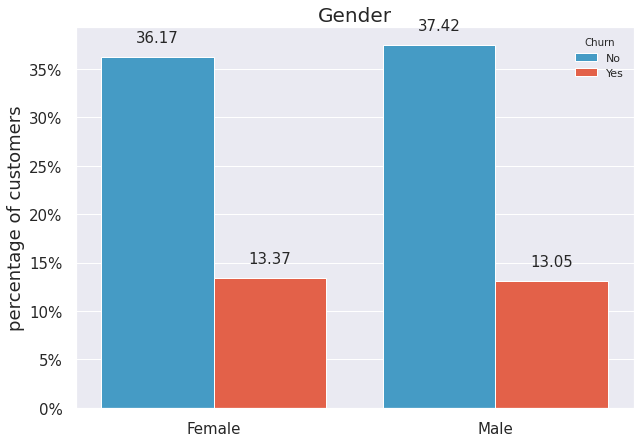

In [9]:
plot_categorical(data=cat_features, feature='gender', title='Gender')

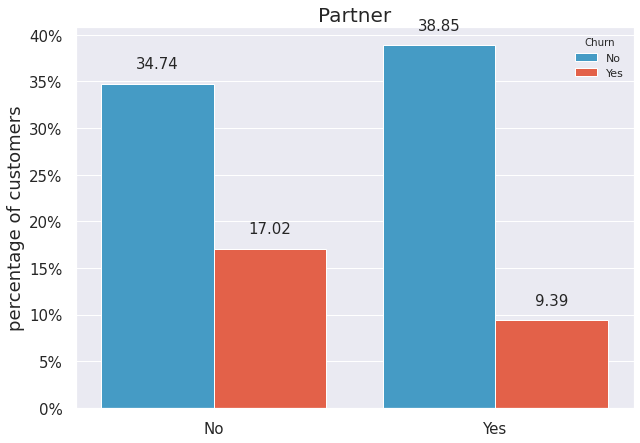

In [10]:
plot_categorical(data=cat_features, feature='Partner', title='Partner')

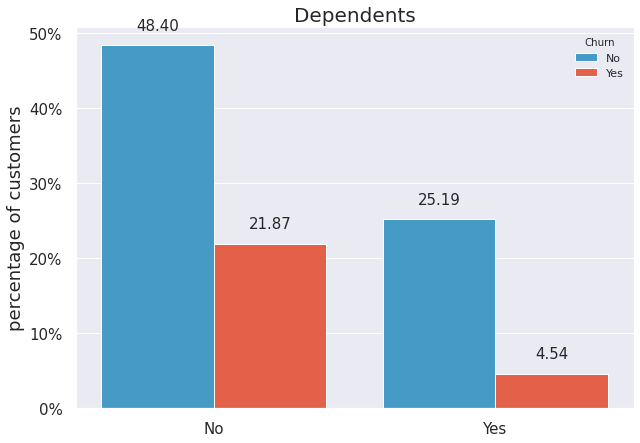

In [11]:
plot_categorical(data=cat_features, feature='Dependents', title='Dependents')

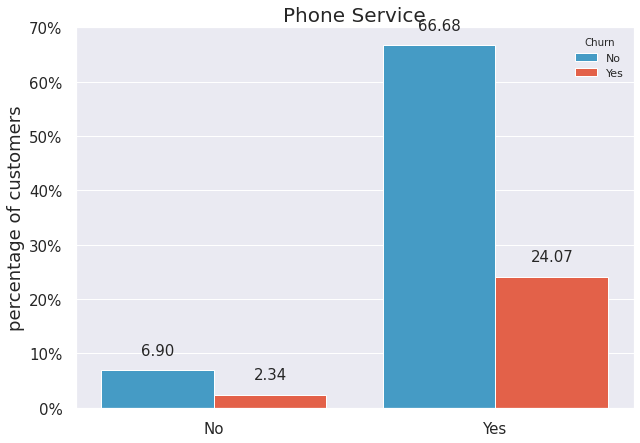

In [12]:
plot_categorical(data=cat_features, feature='PhoneService', title='Phone Service')

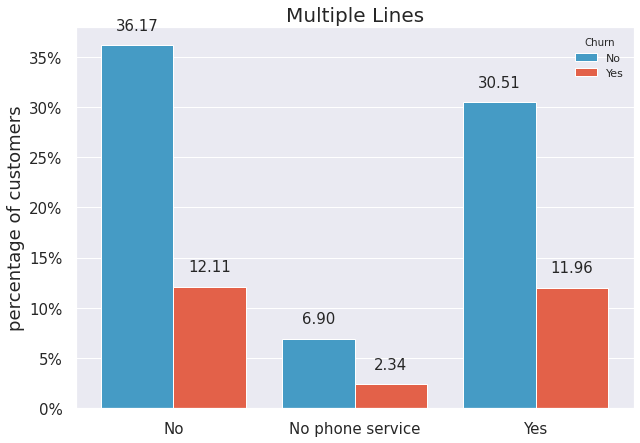

In [13]:
plot_categorical(data=cat_features, feature='MultipleLines', title='Multiple Lines')

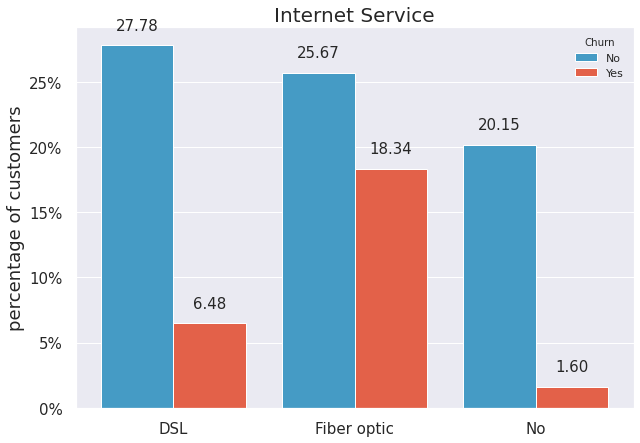

In [14]:
plot_categorical(data=cat_features, feature='InternetService', title='Internet Service')

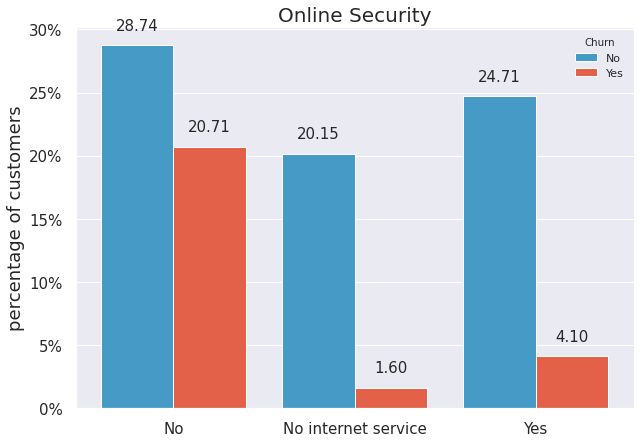

In [15]:
plot_categorical(data=cat_features, feature='OnlineSecurity', title='Online Security')

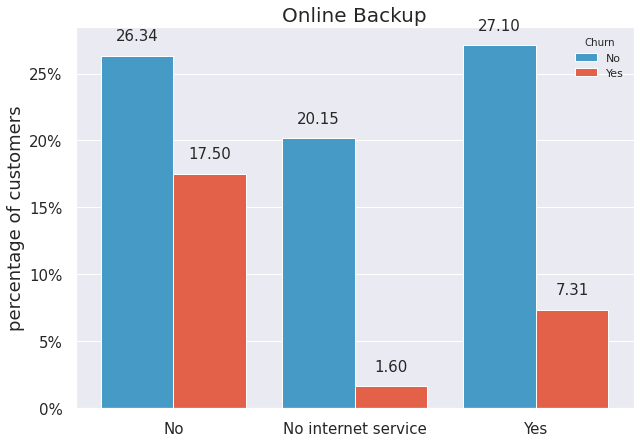

In [16]:
plot_categorical(data=cat_features, feature='OnlineBackup', title='Online Backup')

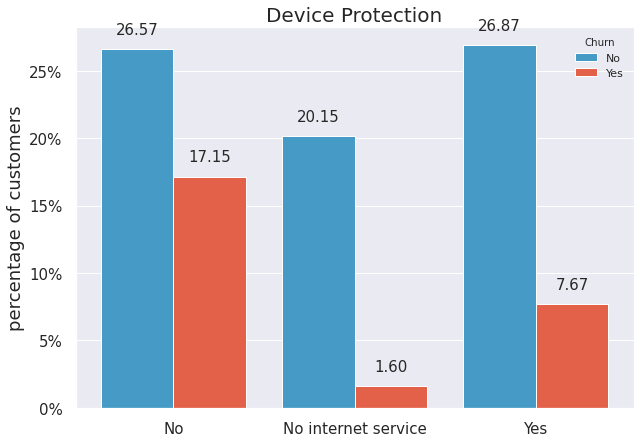

In [17]:
plot_categorical(data=cat_features, feature='DeviceProtection', title='Device Protection')

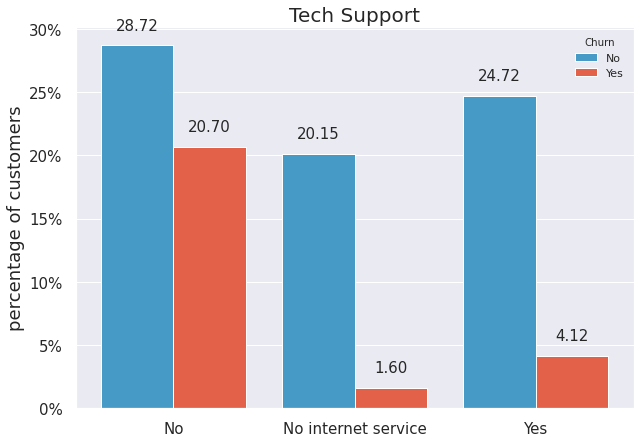

In [18]:
plot_categorical(data=cat_features, feature='TechSupport', title='Tech Support')

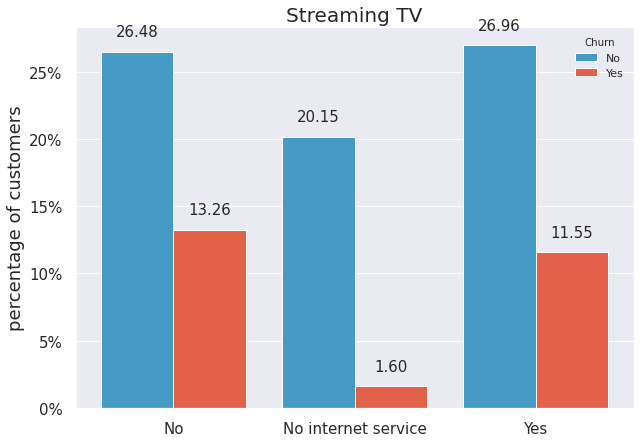

In [19]:
plot_categorical(data=cat_features, feature='StreamingTV', title='Streaming TV')

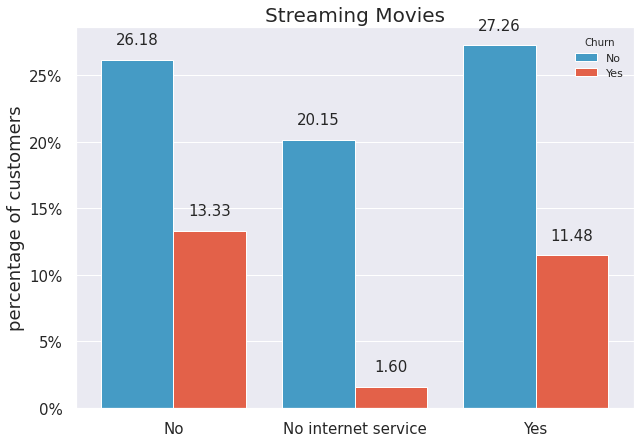

In [20]:
plot_categorical(data=cat_features, feature='StreamingMovies', title='Streaming Movies')

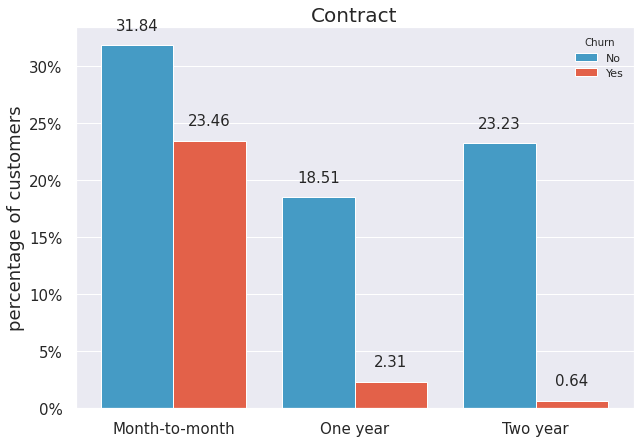

In [21]:
plot_categorical(data=cat_features, feature='Contract', title='Contract')


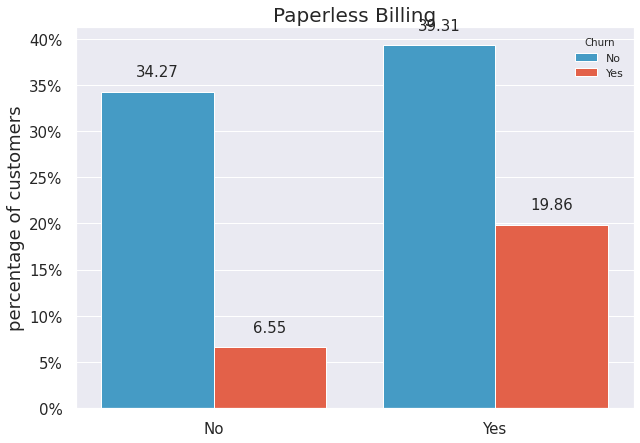

In [22]:
plot_categorical(data=cat_features, feature='PaperlessBilling', title='Paperless Billing')

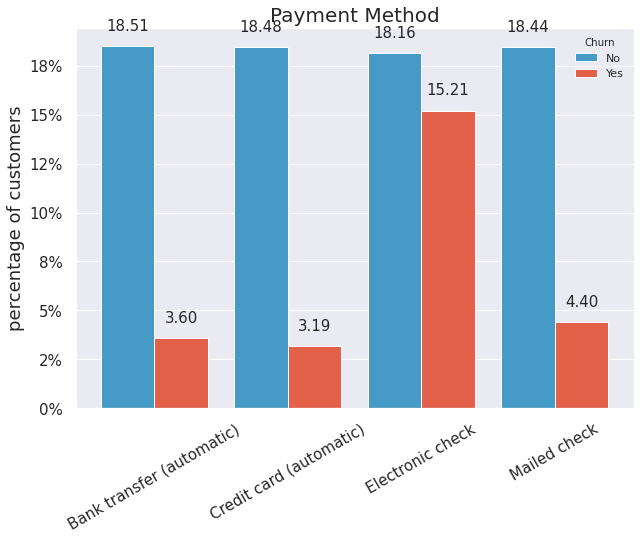

In [23]:
plot_categorical(data=cat_features, feature='PaymentMethod', rotate=30, title='Payment Method')

# Numerical features Realtionship

[]

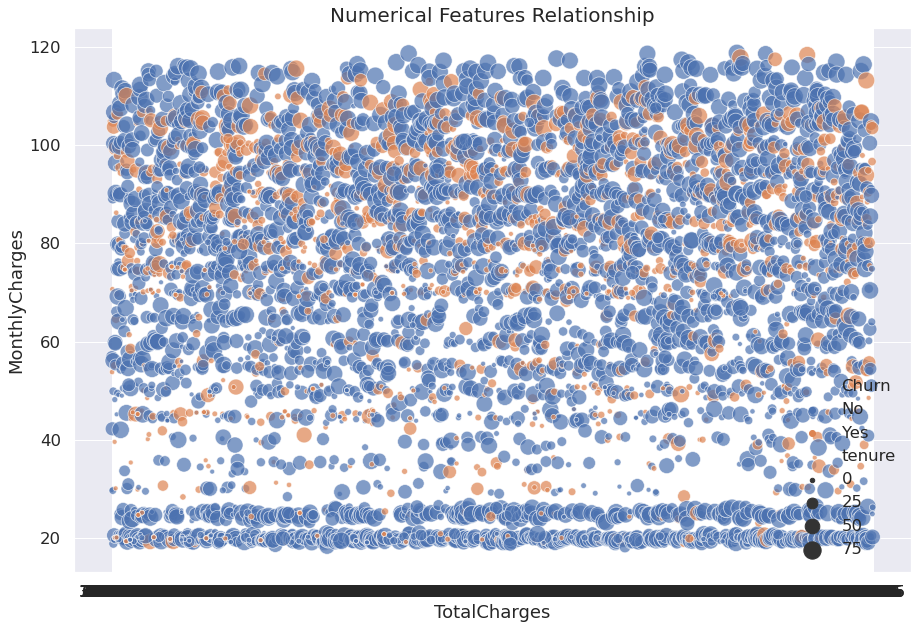

In [24]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale = 1.5)
scatter = sns.scatterplot(x='TotalCharges', y='MonthlyCharges', data=train, hue='Churn', size='tenure', sizes=(20, 300), alpha=0.7)
scatter.axes.set_title('Numerical Features Relationship',fontsize=20)
scatter.plot()

# Identifying relation between Continous Variables:

In [25]:
num_attributes = ['tenure', 'MonthlyCharges']
data_num = train[num_attributes]

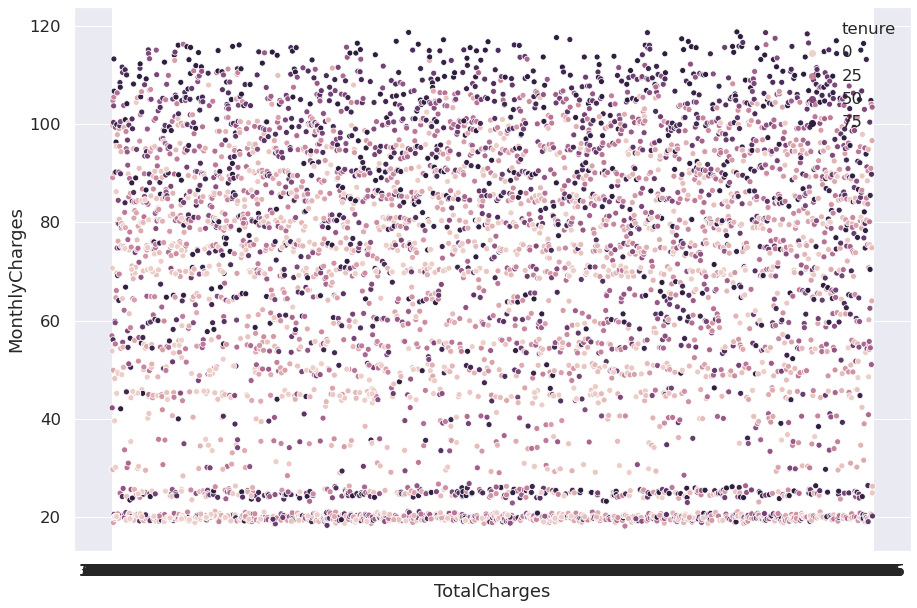

In [26]:
sns.scatterplot(x="TotalCharges", y="MonthlyCharges", hue="tenure", data=train)

# Univaraite Exploration

In [27]:
num_attr = ['tenure','MonthlyCharges']
num_data = train[num_attr]

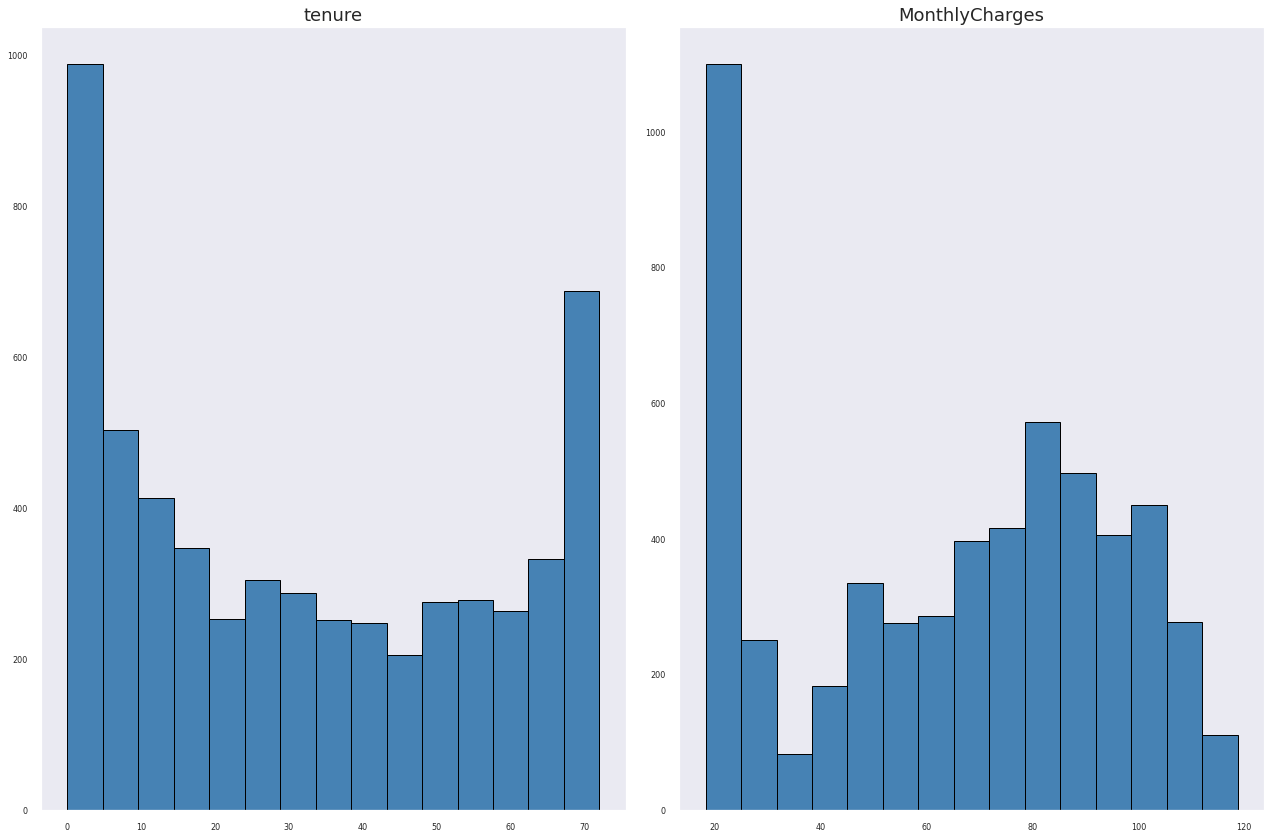

In [28]:
num_data.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(3, 3, 4.2, 4.2))   

# Bivariate Exploration

In [29]:
service =train.iloc[:,6:-4]

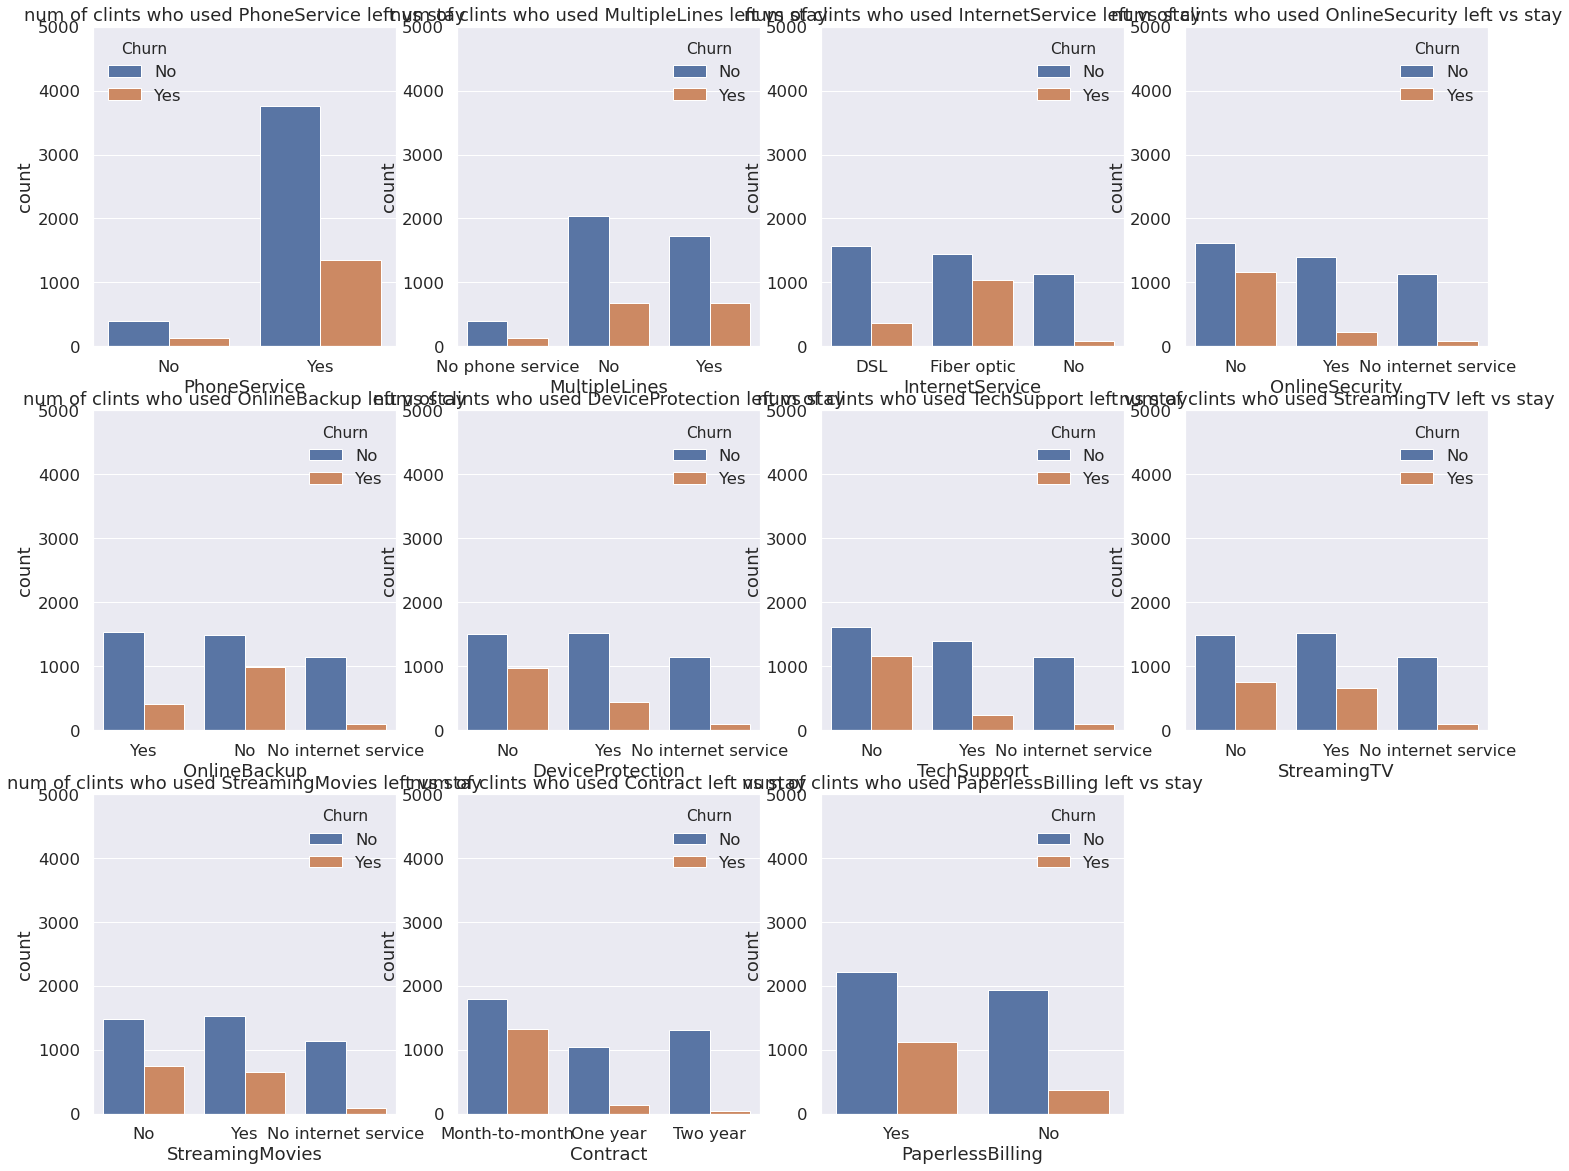

In [30]:
plt.figure(figsize=(25,20))
for i,feature in enumerate(list(service.columns)):
    plt.subplot(3,4,i+1)
    sns.countplot(feature,hue = train.Churn,data=train)
    plt.ylim(0,5000)
    plt.title('num of clints who used {} left vs stay'.format(feature))
plt.show()

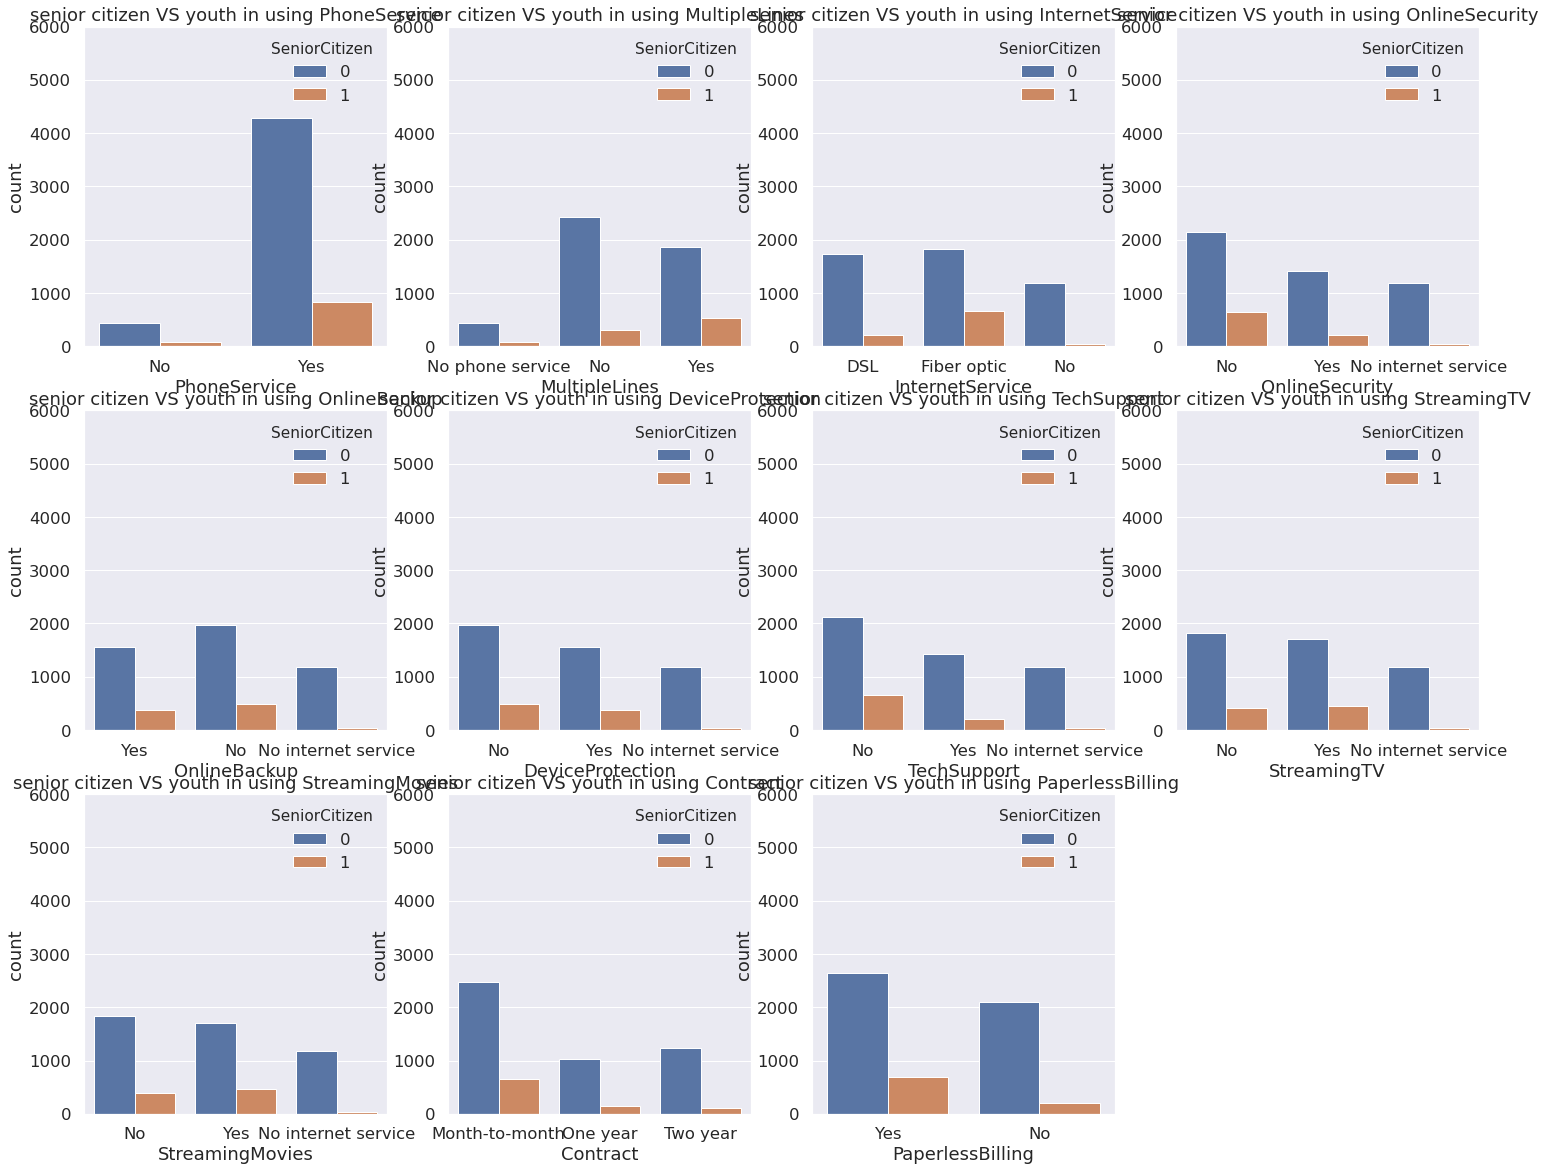

In [31]:
plt.figure(figsize=(25,20))
for i,feature in enumerate(list(service.columns)):
    plt.subplot(3,4,i+1)
    sns.countplot(feature,hue = train.SeniorCitizen,data=train)
    plt.ylim(0,6000)
    plt.title('senior citizen VS youth in using {}'.format(feature))
plt.show()

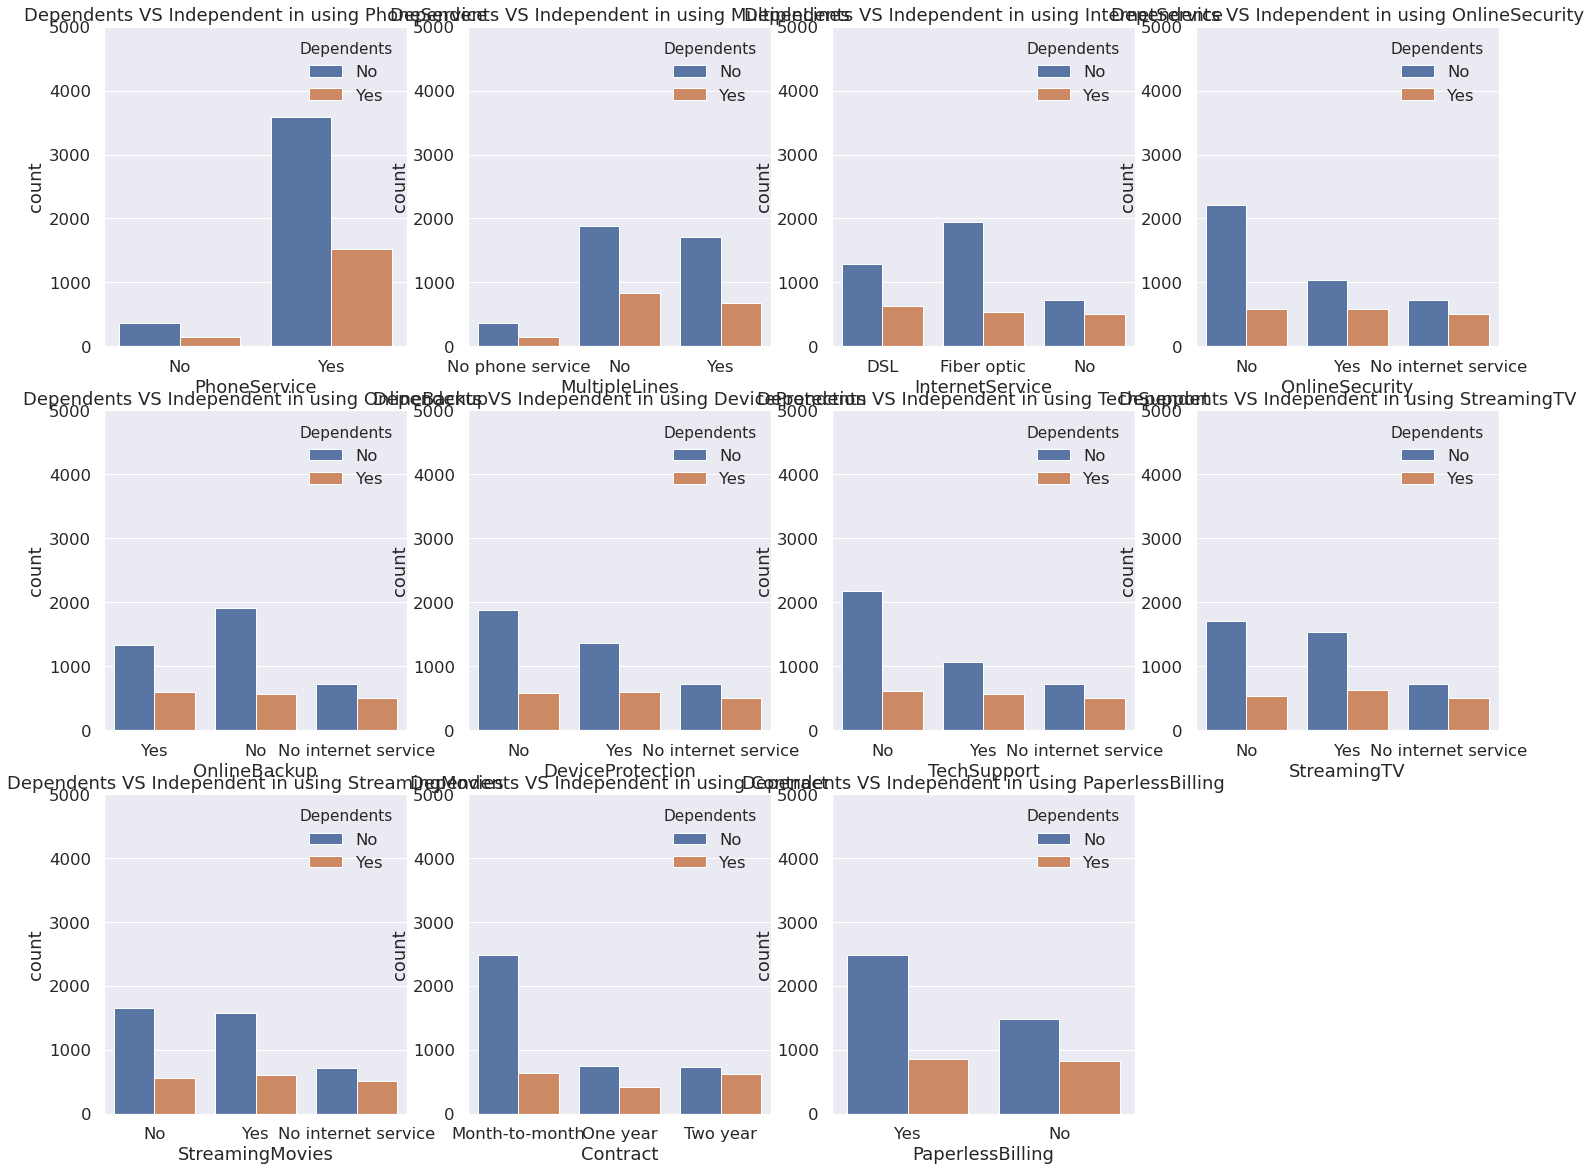

In [32]:
plt.figure(figsize=(25,20))
for i,feature in enumerate(list(service.columns)):
    plt.subplot(3,4,i+1)
    sns.countplot(feature,hue = train.Dependents,data=train)
    plt.ylim(0,5000)
    plt.title('Dependents VS Independent in using {}'.format(feature))
plt.show()

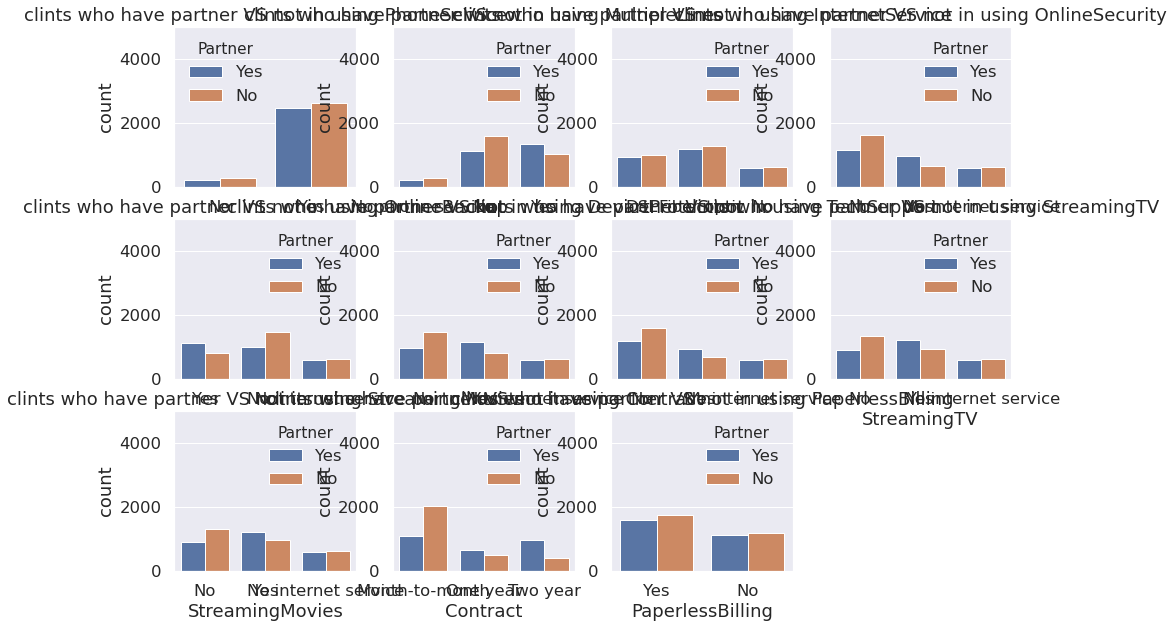

In [33]:
for i,feature in enumerate(list(service.columns)):
    plt.subplot(3,4,i+1)
    sns.countplot(feature,hue = train.Partner,data=train)
    plt.ylim(0,5000)
    plt.title('clints who have partner VS not in using {}'.format(feature))
plt.show()